# Hypotheses:
* Overarching question: How can we maximize sales in specific regions? 

* Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?
* Is there a higher probability of buying one certain category in certain regions?
* Where are they sold most and would a discount affect these sales?
* Is there a region of employees who are maximizing sales for the company? 

# SQL Queries for forming Hypotheses

In [80]:
import sqlite3 
conn = sqlite3.connect("Northwind_small.sqlite")
c = conn.cursor()

In [81]:
c.execute("""Select * FROM 'Order';""")
c.fetchall()

[(10248,
  'VINET',
  5,
  '2012-07-04',
  '2012-08-01',
  '2012-07-16',
  3,
  32.38,
  'Vins et alcools Chevalier',
  "59 rue de l'Abbaye",
  'Reims',
  'Western Europe',
  '51100',
  'France'),
 (10249,
  'TOMSP',
  6,
  '2012-07-05',
  '2012-08-16',
  '2012-07-10',
  1,
  11.61,
  'Toms Spezialitäten',
  'Luisenstr. 48',
  'Münster',
  'Western Europe',
  '44087',
  'Germany'),
 (10250,
  'HANAR',
  4,
  '2012-07-08',
  '2012-08-05',
  '2012-07-12',
  2,
  65.83,
  'Hanari Carnes',
  'Rua do Paço, 67',
  'Rio de Janeiro',
  'South America',
  '05454-876',
  'Brazil'),
 (10251,
  'VICTE',
  3,
  '2012-07-08',
  '2012-08-05',
  '2012-07-15',
  1,
  41.34,
  'Victuailles en stock',
  '2, rue du Commerce',
  'Lyon',
  'Western Europe',
  '69004',
  'France'),
 (10252,
  'SUPRD',
  4,
  '2012-07-09',
  '2012-08-06',
  '2012-07-11',
  2,
  51.3,
  'Suprêmes délices',
  'Boulevard Tirou, 255',
  'Charleroi',
  'Western Europe',
  'B-6000',
  'Belgium'),
 (10253,
  'HANAR',
  3,
  '2012-07

In [82]:
c.execute("""SELECT name FROM sqlite_master
WHERE type='table'
ORDER BY name;""")
c.fetchall()

[('Category',),
 ('Customer',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Employee',),
 ('EmployeeTerritory',),
 ('Order',),
 ('OrderDetail',),
 ('Product',),
 ('Region',),
 ('Shipper',),
 ('Supplier',),
 ('Territory',)]

In [83]:
c.execute("""SELECT ShipRegion FROM 'Order'""")
c.fetchall()

[('Western Europe',),
 ('Western Europe',),
 ('South America',),
 ('Western Europe',),
 ('Western Europe',),
 ('South America',),
 ('Western Europe',),
 ('Western Europe',),
 ('South America',),
 ('South America',),
 ('Western Europe',),
 ('Central America',),
 ('Western Europe',),
 ('South America',),
 ('North America',),
 ('Western Europe',),
 ('Northern Europe',),
 ('Western Europe',),
 ('Scandinavia',),
 ('Western Europe',),
 ('South America',),
 ('North America',),
 ('Scandinavia',),
 ('North America',),
 ('North America',),
 ('Western Europe',),
 ('Western Europe',),
 ('Southern Europe',),
 ('Central America',),
 ('Western Europe',),
 ('Northern Europe',),
 ('Western Europe',),
 ('Northern Europe',),
 ('Southern Europe',),
 ('Southern Europe',),
 ('South America',),
 ('Western Europe',),
 ('Western Europe',),
 ('Western Europe',),
 ('South America',),
 ('Southern Europe',),
 ('British Isles',),
 ('South America',),
 ('South America',),
 ('South America',),
 ('Central America',),


In [84]:
c.execute("""SELECT ProductName from Product""")
c.fetchall()

[('Chai',),
 ('Chang',),
 ('Aniseed Syrup',),
 ("Chef Anton's Cajun Seasoning",),
 ("Chef Anton's Gumbo Mix",),
 ("Grandma's Boysenberry Spread",),
 ("Uncle Bob's Organic Dried Pears",),
 ('Northwoods Cranberry Sauce',),
 ('Mishi Kobe Niku',),
 ('Ikura',),
 ('Queso Cabrales',),
 ('Queso Manchego La Pastora',),
 ('Konbu',),
 ('Tofu',),
 ('Genen Shouyu',),
 ('Pavlova',),
 ('Alice Mutton',),
 ('Carnarvon Tigers',),
 ('Teatime Chocolate Biscuits',),
 ("Sir Rodney's Marmalade",),
 ("Sir Rodney's Scones",),
 ("Gustaf's Knäckebröd",),
 ('Tunnbröd',),
 ('Guaraná Fantástica',),
 ('NuNuCa Nuß-Nougat-Creme',),
 ('Gumbär Gummibärchen',),
 ('Schoggi Schokolade',),
 ('Rössle Sauerkraut',),
 ('Thüringer Rostbratwurst',),
 ('Nord-Ost Matjeshering',),
 ('Gorgonzola Telino',),
 ('Mascarpone Fabioli',),
 ('Geitost',),
 ('Sasquatch Ale',),
 ('Steeleye Stout',),
 ('Inlagd Sill',),
 ('Gravad lax',),
 ('Côte de Blaye',),
 ('Chartreuse verte',),
 ('Boston Crab Meat',),
 ("Jack's New England Clam Chowder",),
 

# Hypothesis 1: Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

## EDA: 

In [85]:
import pandas as pd

In [86]:
sql_query_1 = c.execute("""SELECT ProductName, Quantity, Discount FROM OrderDetail o JOIN Product p ON o.ProductId = p.Id""")
hyp_1_df = pd.DataFrame(sql_query_1, columns = ["Product Name", "Quantity", "Discount"])
hyp_1_df.head()

,Product Name,Quantity,Discount
0,Queso Cabrales,12,0.0
1,Singaporean Hokkien Fried Mee,10,0.0
2,Mozzarella di Giovanni,5,0.0
3,Tofu,9,0.0
4,Manjimup Dried Apples,40,0.0


In [87]:
c.execute("""SELECT * FROM OrderDetail""")
c.fetchall()
pd.read_sql("""SELECT * FROM OrderDetail""",conn).head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [88]:
pd.read_sql("""SELECT * FROM Product""",conn).head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [89]:
#I want to check to make sure there are actually discounts in this data frame. 
discount_amounts = hyp_1_df.loc[hyp_1_df["Discount"]>0]
discount_amounts

,Product Name,Quantity,Discount
6,Manjimup Dried Apples,35,0.15
7,Louisiana Fiery Hot Pepper Sauce,15,0.15
8,Gustaf's Knäckebröd,6,0.05
9,Ravioli Angelo,15,0.05
11,Sir Rodney's Marmalade,40,0.05
12,Geitost,25,0.05
17,Guaraná Fantástica,15,0.15
18,Pâté chinois,21,0.15
29,Chang,50,0.20
30,Chef Anton's Gumbo Mix,65,0.20


## Visualizations: 

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Average Quantity of Orders based on Discount Level')

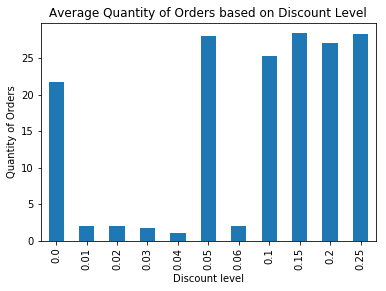

In [91]:
discount_averages = hyp_1_df.groupby('Discount')['Quantity'].mean()
discount_averages.plot(kind = 'bar')
plt.xlabel("Discount level")
plt.ylabel("Quantity of Orders")
plt.title("Average Quantity of Orders based on Discount Level")

At first glance, this graph seems to show that a 5% discount is just as effective as a 25% discount. First, I'll test that a 5% discount is greater than no discount, then test against different levels of discount. 

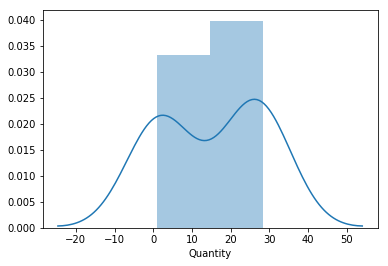

In [92]:
sns.distplot(discount_averages)

In [93]:
import scipy.stats as st

In [94]:
import numpy as np

In [95]:
st.normaltest(discount_averages)

C:\Users\kayce_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=11.466050339621862, pvalue=0.0032372691166793668)

The mean of the quantity ordered at each discount does not appear to follow a normal distribution. This limits my options to prove statistical significance. I will check the central limit theorem to see if that creates a normal distribution. 

In [96]:
y = hyp_1_df['Quantity']


def get_sample(data,n):
    """A function to pull random samples from the original dataset"""
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    return sample
get_sample(y,30)

[20,
 25,
 12,
 40,
 80,
 10,
 35,
 6,
 5,
 8,
 6,
 6,
 30,
 1,
 50,
 3,
 6,
 15,
 60,
 25,
 6,
 16,
 120,
 5,
 20,
 7,
 12,
 6,
 6,
 50]

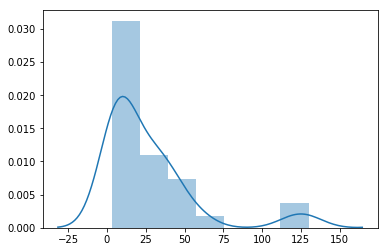

In [97]:
samples = get_sample(y, 30)
sns.distplot(samples)

In [98]:
def sample_mean(data, n):
    """Takes samples and calculates the mean"""
    return sum(data)/len(data)

In [99]:
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean_1 = sample_mean(sample, n = 30)
        sample_dist.append(sample_mean_1)
    return sample_dist

In [100]:
sample_distribution = create_sample_distribution(y, n = 30)

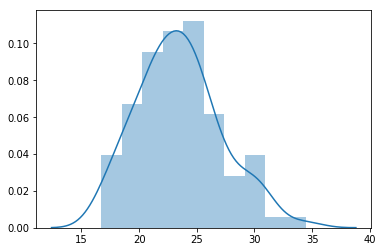

In [101]:
sns.distplot(sample_distribution)

Even with the central limit theorem, the data is not very normal-looking. I don't think using the central limit theorem will be worth the added complication. 

## Type of Test to Use: 

In [102]:
#What am i testing? Is there a correlation between discount and order level. 
#First, test between 0 and 0.05, then 0.1,0.15,0.2,0.25
#Prove a discount makes a difference first, then test at what level

#Use a Welch's T Test, set critical t. 
##This will show whether 0 and 0.05 are different statistically. 

#This will determine level at which disount is most appropriate. 
#set alpha = 0.05
#critical t = 

#monte carlo simulations 

If I use a Welch's T-Test, I can use it to check for differences between the means of no discount and the 5% discount. Welch's T-Test will be most appropriate because of the lack of normal distribution, and possible difference in standard deviations. 

## Testing: 

* H_o = There is no statistical difference in means between no discount and a 5% discount and number of orders
* H_a = There is a correlation between discount level and number of orders (fix- quantity for 5% is greater (two tailed vs. one tail))

In [103]:
def welch_t(a, b):
    
    """ Calculate Welch's T Test """
    numerator = a.mean() - b.mean()
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

In [104]:
test_0 = hyp_1_df.loc[hyp_1_df["Discount"] == 0.00]
test_0.head()
zero = test_0["Quantity"].values
zero

array([12, 10,  5, ...,  1,  4,  2], dtype=int64)

In [105]:
test_5 = hyp_1_df.loc[hyp_1_df["Discount"] == 0.05]
test_5.head()
five = test_5["Quantity"].values
five

array([  6,  15,  40,  25,  12,  60,  20,  24,  15,  60,  33,  12,   6,
        10,   8,  20,  12,  70,  20,  12,  40,   4,  20,  77,  10,  10,
        10,  20,  56,  70,  80,  42,  30,  40,  30,  18,  60,  20, 100,
        16,  20,  80,   2,  20,  35,  30,  60,  20,  20,  12,   8,  16,
        10,  50,  24,  15,  24,  30,  20,  20,  10,  12,  18,  16,   6,
        25,  15,  60,  15,   9,  30,  50,  60,  25,   5,  25,  30,  20,
        70,  15,  15,  15,  15,  12,  30,  20,  25,  60,  25,  70,  55,
        70,  20,  24,  40,  30,  30,  20,   8,  12,  65,   8,   3,  32,
        25,  50,  20,  10,  10,  15,   3,  10,  40,  30,  28,  30,  15,
        16,  12,  27, 120,  15,  20,  50,  40,  14,  20,  24,  15,  15,
        30,  20,   8,  20,   5,  10,  10,  42,  60,  80,  50,  12,  16,
        10,  20,  15,  21,  20,  40,  21,  12,  15,  40,  28,  50, 120,
        20,  20,  14,  15,   6,  50,  16,  50,  50,   6,  18,  20,  15,
        21,  70,  90,  40,  50,  36,  60,  20,  15,  18,  15,  1

In [106]:
t = welch_t(zero, five)
t

3.700844260760871

In [107]:
def welch_df(a,b):
    
    """ Calculate the degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = ((s1/ n1)**2/(n1 - 1)) + ((s2/ n2)**2/(n2 - 1))
    
    return numerator/denominator

In [108]:
df = welch_df(zero, five)
df

217.36031100748286

In [109]:
import scipy.stats as stats

In [110]:
# p = 1- stats.t.cdf(t, df)
# p
stats.ttest_ind(zero, five, equal_var = False)

Ttest_indResult(statistic=-3.700844260760871, pvalue=0.00027233494432847593)

## Interpret Test:

The extremely low p value tells us that we are able to reject the null- there is a statistical difference in means between a 5% discount and quantity of sales. Next, we will look at the lowest level that the discount becomes significant. 

## Testing Different Levels (test against 5%) - 0.1,0.15,0.2,0.25

### Ten

In [111]:
test_ten = hyp_1_df.loc[hyp_1_df["Discount"] == 0.10]
test_ten.head()
ten= test_ten["Quantity"].values
ten

array([ 10,   3,  20,  24,   2,  40,  30,  15,  25,  25,  30,  40,  30,
        25,  10,  40,  18,  36,  15,  18,  54,  55,   5,  13,  35,   8,
        16,  20,  18,  20,   6,  60,  40,  24,  28,  70, 120,  30,  42,
         5,   2,  20,  20,   2,   8,  20,  40,  30,  24,  12,  20,   3,
        15, 120,  35,  28,  55,  15,  25,  18,  30,  20,  20,  30,  60,
        15,  10,  10,  18,  14,  36,  25,  80,  25,  15,  18,   6,  15,
        50,  30,  50,  10,   5,  15,  35,   4,  36,   9,   8,   6,  10,
        20,  10,  25,  18,  12,  10,  15,   6,  10,   8,  15,  25,  30,
         8,  10,  15,   4,  21,  30,  20,  12,  20,   6,   3,  28,   6,
         8,   4,  15,  15,  30,  12,  18,  60,  20,   2,  12,  20,  20,
       130,  80,  50,  10,   7,  16,  40,  20,  40,  15,  20,   9,   9,
        30,  15,  70,  25,  42,  60,  42,  21,  20,  30,  30,  14,  20,
        36,   8,  35,  40,  28,  10,  20,  70,  36,  15,  50,  40,  30,
        77,  25,   4,   2], dtype=int64)

In [112]:
t_10 = welch_t(zero,ten)

In [113]:
df_10 = welch_df(zero,ten)

In [114]:
stats.ttest_ind(five, ten, equal_var = False)

Ttest_indResult(statistic=1.209941058797434, pvalue=0.22710466225198522)

### Fifteen

In [115]:
test_fifteen = hyp_1_df.loc[hyp_1_df["Discount"] == 0.15]
test_fifteen.head()
fifteen = test_5["Quantity"].values
fifteen

array([  6,  15,  40,  25,  12,  60,  20,  24,  15,  60,  33,  12,   6,
        10,   8,  20,  12,  70,  20,  12,  40,   4,  20,  77,  10,  10,
        10,  20,  56,  70,  80,  42,  30,  40,  30,  18,  60,  20, 100,
        16,  20,  80,   2,  20,  35,  30,  60,  20,  20,  12,   8,  16,
        10,  50,  24,  15,  24,  30,  20,  20,  10,  12,  18,  16,   6,
        25,  15,  60,  15,   9,  30,  50,  60,  25,   5,  25,  30,  20,
        70,  15,  15,  15,  15,  12,  30,  20,  25,  60,  25,  70,  55,
        70,  20,  24,  40,  30,  30,  20,   8,  12,  65,   8,   3,  32,
        25,  50,  20,  10,  10,  15,   3,  10,  40,  30,  28,  30,  15,
        16,  12,  27, 120,  15,  20,  50,  40,  14,  20,  24,  15,  15,
        30,  20,   8,  20,   5,  10,  10,  42,  60,  80,  50,  12,  16,
        10,  20,  15,  21,  20,  40,  21,  12,  15,  40,  28,  50, 120,
        20,  20,  14,  15,   6,  50,  16,  50,  50,   6,  18,  20,  15,
        21,  70,  90,  40,  50,  36,  60,  20,  15,  18,  15,  1

In [116]:
t_15 = welch_t(zero,fifteen)

In [117]:
df_15 = welch_df(zero, fifteen)

In [118]:
stats.ttest_ind(zero, fifteen, equal_var = False)

Ttest_indResult(statistic=-3.700844260760871, pvalue=0.00027233494432847593)

### Twenty

In [119]:
test_twenty = hyp_1_df.loc[hyp_1_df["Discount"] == 0.20]
test_twenty.head()
twenty = test_twenty["Quantity"].values
twenty

array([ 50,  65,   6,  12,  45,  40,  36,  25,  50,  35,  30,  40,  10,
        16,   7,  25,   6,  48,  24,  56,  40,  40,  12,  50,  30,   8,
         6,  80,  50,  10,  20,   8,  15,  20,  25,  40,   9,  60,  49,
        30,  45,  70,  15,  20,  15,   6,  20,   6,  20,  20,  10,  16,
        30,  20,  40,  50,  15,  40,  20,  25,   8,  10,  10,  30,  35,
        18,  20,  40,  60,  40,  35,  50,  40, 100,  21,  20,   4,   5,
        24,  30,  35,  12,  20,  20,  10,  18,  30,  20,  20,   3,  49,
        45,  14,  30,   5,  12,  40,  60,   5,  35,  40,  14,  15,  50,
        21,  20,   6,  20,  70,   7,  20,   3,  20,  30,  15,  42,  15,
         6,  21,  35,  24,  12,   3,  10,  16,   2,   6,  10,  80,  12,
        60,  36,  45,  55,  30,  30,  50,  10,  10,  24,  25,  30,  30,
        12,  40,  40,  50,  20,  90,   5,  30,  10,   4,  10,  30,  10,
        35,  25,  10,  12,  24], dtype=int64)

In [120]:
t_20 = welch_t(zero,twenty)

In [121]:
df_20 = welch_df(zero, twenty)

In [122]:
stats.ttest_ind(zero, twenty, equal_var = False)

Ttest_indResult(statistic=-3.4021239132172787, pvalue=0.0008110033254043408)

### Twenty Five

In [123]:
test_twentyfive = hyp_1_df.loc[hyp_1_df["Discount"] == 0.25]
test_twentyfive.head()
twentyfive = test_twentyfive["Quantity"].values
twentyfive

array([ 16,  15,  21,  60,  60,  36,  15,  15,  20,   5,  40,  30,  70,
        18,  12,  40,  70,  42,  25,  42,   7,  70,   2,  36,  10,  20,
        35,  50,  50,  30,  21,   4,  40,  28,  60,  21,  20,  24,  15,
        15,  35,  10,  15,  30, 120,  65,   5,  21,  20,  15,  15,  21,
         2,  15,  18,  30,  35,  12,  20,   2,  50,  20,  40,  50,   6,
        35,  20,  30,   7,   9,  30,  30,  30,  27,  50,  18,  12,  12,
         3,  40,  30,  30,  14,  25,  12,  30,  35,  15,   2,  35,  40,
        20,  25,  30,  60,   5,  20,  15,  40,  21,   4,  25,  50,   4,
        35,  10,  40,  35,  30,  21,   6,  40,  30,   3,  40,  60,  30,
        40,  60,  25,   4,   8,  20,  24,  49,  35,  44,  30,  80,   5,
        18,  10,  50,  35,  20,  20,  25,  30,   2,  18,  11,  44,  30,
        21, 100,  60, 100,  25,  30,   4,  20,  20,  20,  10], dtype=int64)

In [124]:
t_25 = welch_t(zero,twentyfive)

In [125]:
df_25 = welch_df(zero, twentyfive)

In [126]:
stats.ttest_ind(zero, twentyfive, equal_var = False)

Ttest_indResult(statistic=-3.8572676240072523, pvalue=0.00015923050922125637)

## Interpretation A :
All of these values are statistically significant given their p values are less than 0.05. The level at which the discount becomes apparent can be tested by testing the following null hypothesis. This hypothesis was formulated based on a brief overview of the graph of mean order numbers based on discount. 

* H_0 = The means between a 5% discount and other levels of discount do not vary statistically. 
* H_a = The means between a 5% discount and other levels of discount vary statistically. 

In [127]:
stats.ttest_ind(five, ten, equal_var = False)

Ttest_indResult(statistic=1.209941058797434, pvalue=0.22710466225198522)

The p-value is greater than 0.05. We cannot reject the null- there is not a statistical difference between a 5% and 15% discount. 

In [128]:
stats.ttest_ind(five, fifteen, equal_var = False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

The p-value is greater than 0.05. We cannot reject the null- there is not a statistical difference between a 5% and 10% discount. 

In [129]:
stats.ttest_ind(five, twenty, equal_var = False)

Ttest_indResult(statistic=0.4470597476296268, pvalue=0.6551134299813659)

The p-value is greater than 0.05. We cannot reject the null- there is not a statistical difference between a 5% and 20% discount. 

In [130]:
stats.ttest_ind(five, twentyfive, equal_var = False)

Ttest_indResult(statistic=-0.09976173385499833, pvalue=0.9205932482537716)

A p-value of 0.37(greater than 0.05) means we cannot reject the null-there is no statistically signficant difference between the means of sales at a 5% discount and a 25% discount

## Conclusions: 

We concluded that there is a statistical difference in means between having no discount and a 5% discount. However, the 5% discount was not statistically significant compared to the 25% discount. My recommendation to the company would be to implement the 5% discount and forgo the 25% discount in order to save money and still retain order numbers. 

# Hypothesis 2:  Is there a higher probability of buying one certain category in certain regions?

## EDA:

In [131]:
sql_query_2 = c.execute("""SELECT CategoryName, Quantity,ShipRegion FROM Category c
                                                      JOIN Product p
                                                      ON c.Id = p.CategoryID
                                                      JOIN OrderDetail od
                                                      ON p.Id = od.ProductId
                                                      JOIN 'Order' o
                                                      ON od.OrderId = o.Id""")
category_df = pd.DataFrame(sql_query_2,columns = ["CategoryName", "Quantity", "ShipRegion"])
category_df.head()

,CategoryName,Quantity,ShipRegion
0,Dairy Products,12,Western Europe
1,Grains/Cereals,10,Western Europe
2,Dairy Products,5,Western Europe
3,Produce,9,Western Europe
4,Produce,40,Western Europe


In [132]:
pd.read_sql("""SELECT * FROM Category""",conn).head()

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [133]:
pd.read_sql("""SELECT * FROM Product""",conn).head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [134]:
pd.read_sql("""SELECT * FROM OrderDetail""",conn).head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [135]:
pd.read_sql("""SELECT * FROM 'Order'""",conn).head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


## Visualizations:

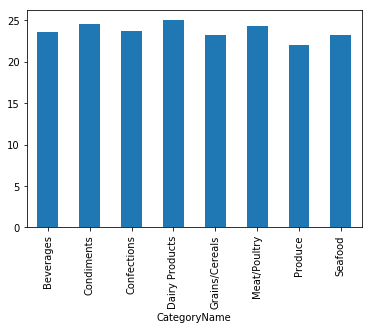

In [136]:
popular_products = category_df.groupby('CategoryName')['Quantity'].mean()
popular_products.plot(kind = "bar")
plt.show()

In [137]:
popular_products

CategoryName
Beverages         23.594059
Condiments        24.527778
Confections       23.670659
Dairy Products    24.997268
Grains/Cereals    23.275510
Meat/Poultry      24.271676
Produce           21.985294
Seafood           23.275758
Name: Quantity, dtype: float64

The goal of this graph was to determine if one product class is more popular than the others so we could maximize profits on one specific product class. The most popular product class seems to be Dairy Products, therefore that will be the category that I want to maximize sales on. 

### Looking specifically at Dairy Products: 


In [138]:
# I want to see whether Dairy Products are most popular in one specific region. 

In [139]:
dairy_products_df = category_df.loc[category_df["CategoryName"] == "Dairy Products"]
dairy_products_df.head()

,CategoryName,Quantity,ShipRegion
0,Dairy Products,12,Western Europe
2,Dairy Products,5,Western Europe
12,Dairy Products,25,Western Europe
13,Dairy Products,40,Western Europe
14,Dairy Products,20,South America


In [140]:
#Try to get a list of regions
c.execute("""SELECT ShipRegion FROM 'Order'""")
regions = pd.DataFrame(c.fetchall())
region_list = regions[0].unique()
region_list

array(['Western Europe', 'South America', 'Central America',
       'North America', 'Northern Europe', 'Scandinavia',
       'Southern Europe', 'British Isles', 'Eastern Europe'], dtype=object)

Text(0.5, 1.0, 'Mean Quantity Sold based on Region')

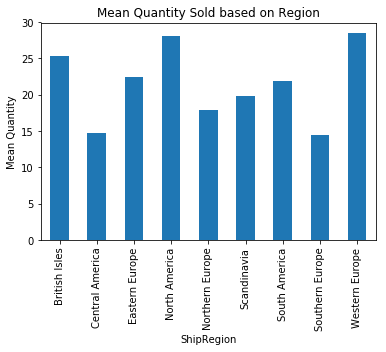

In [141]:
plot_data = dairy_products_df.groupby("ShipRegion")["Quantity"].mean()
plot_data.plot(kind = 'bar')
plt.ylabel("Mean Quantity")
plt.title("Mean Quantity Sold based on Region")

In [142]:
plot_data

ShipRegion
British Isles      25.380952
Central America    14.764706
Eastern Europe     22.500000
North America      28.115942
Northern Europe    17.882353
Scandinavia        19.769231
South America      21.898305
Southern Europe    14.428571
Western Europe     28.511278
Name: Quantity, dtype: float64

In [143]:
st.normaltest(plot_data)

C:\Users\kayce_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.0331151791465487, pvalue=0.5965706583395692)

In [144]:
len(dairy_products_df)

366

### First Sample- North America

In [145]:
north_america = dairy_products_df.loc[dairy_products_df["ShipRegion"] == "North America"]
north_america = north_america["Quantity"]
north_america.head()

57    60
58    20
61    24
63    40
64    24
Name: Quantity, dtype: int64

### Second Sample - Western Europe

In [146]:
western_europe = dairy_products_df.loc[dairy_products_df["ShipRegion"] == "Western Europe"]
western_europe = western_europe["Quantity"]
western_europe.head()

0     12
2      5
12    25
13    40
23    30
Name: Quantity, dtype: int64

### Third Sample - Southern Europe

In [147]:
southern_europe = dairy_products_df.loc[dairy_products_df["ShipRegion"] == "Southern Europe"]
southern_europe = southern_europe["Quantity"]
southern_europe.head()

73      6
213     9
516     6
576    20
842    20
Name: Quantity, dtype: int64

## What type of test to use: 

Due to the high p value (.59) we cannot reject the null - the data is not normally distributed. However, I have 366 samples.   This leads me to believe that a Welch's T Test will also be appropropriate here. I will be testing between the highest means to determine if it will be more effective to maximize sales in one specific area. The regions tested will be North America and Western Europe. 

* H_0 = There is no significant difference in means between North America and Western Europe in sales of Dairy Products. 
* H_a = There is a significant difference in means between North America and Western Europe in sales of Dairy Products. 

## Test: 

In [148]:
stats.ttest_ind(north_america, western_europe, equal_var = False)

Ttest_indResult(statistic=-0.12773783516047812, pvalue=0.8985599225827511)

## Interpret Results: 

The p value is 0.89, which means we cannot reject the null. There is not a statistical difference between North America and Western Europe in mean sales.

## Further Testing: 

* H_o = There is no statistical difference in means between Western Europe and Southern Europe.
* H_a = Western Europe has a higher statistical mean than Southern Europe. 

In [149]:
stats.ttest_ind(western_europe, southern_europe, equal_var = False)

Ttest_indResult(statistic=4.233590272154623, pvalue=0.0003073362921399661)

Because our p-value is less than 0.05, we can reject the null. Western Europe has a statistically higher mean of quantities than Southern Europe. 

## Conclusions: 

We have decided there is not a statistical difference in means between Western Europe and North America. From a business standpoint, this points to maximizing sales in both of these regions. Further testing could compare other regions and whether adding a third country to focus on maximizing sales would be a good idea to maximize profits. Consider increasing stock and marketing for Dairy Products in Western Europe and North America. Conversely, more marketing and other sales-boosting activities may be needed in Southern Europe, at least for Dairy Products. 

# Hypothesis 3: Where are they sold most and would a discount affect these sales?

## EDA:

In [150]:
#i need discount levels for dairy products in western europe, north america and southern europe.  

In [151]:
sql_query_2 = c.execute("""SELECT CategoryName, Quantity,ShipRegion, Discount
                                                      FROM Category c
                                                      JOIN Product p
                                                      ON c.Id = p.CategoryID
                                                      JOIN OrderDetail od
                                                      ON p.Id = od.ProductId
                                                      JOIN 'Order' o
                                                      ON od.OrderId = o.Id""")
discount_df = pd.DataFrame(sql_query_2,columns = ["CategoryName", "Quantity", "ShipRegion", "Discount"])
discount_df.head()

,CategoryName,Quantity,ShipRegion,Discount
0,Dairy Products,12,Western Europe,0.0
1,Grains/Cereals,10,Western Europe,0.0
2,Dairy Products,5,Western Europe,0.0
3,Produce,9,Western Europe,0.0
4,Produce,40,Western Europe,0.0


In [152]:
dairy = discount_df.loc[discount_df["CategoryName"] == "Dairy Products"]
dairy.head()

,CategoryName,Quantity,ShipRegion,Discount
0,Dairy Products,12,Western Europe,0.00
2,Dairy Products,5,Western Europe,0.00
12,Dairy Products,25,Western Europe,0.05
13,Dairy Products,40,Western Europe,0.00
14,Dairy Products,20,South America,0.00


In [153]:
dairy_western_europe = dairy.loc[dairy["ShipRegion"] == "Western Europe"]
dairy_western_europe.head()

,CategoryName,Quantity,ShipRegion,Discount
0,Dairy Products,12,Western Europe,0.00
2,Dairy Products,5,Western Europe,0.00
12,Dairy Products,25,Western Europe,0.05
13,Dairy Products,40,Western Europe,0.00
23,Dairy Products,30,Western Europe,0.00


In [154]:
dairy_north_america = dairy.loc[dairy["ShipRegion"] == "North America"]
dairy_north_america.head()

,CategoryName,Quantity,ShipRegion,Discount
57,Dairy Products,60,North America,0.05
58,Dairy Products,20,North America,0.05
61,Dairy Products,24,North America,0.00
63,Dairy Products,40,North America,0.00
64,Dairy Products,24,North America,0.00


In [155]:
dairy_southern_europe = dairy.loc[dairy["ShipRegion"] == "Southern Europe"]
dairy_southern_europe.head()

,CategoryName,Quantity,ShipRegion,Discount
73,Dairy Products,6,Southern Europe,0.05
213,Dairy Products,9,Southern Europe,0.00
516,Dairy Products,6,Southern Europe,0.20
576,Dairy Products,20,Southern Europe,0.00
842,Dairy Products,20,Southern Europe,0.10


## Visualizations: 

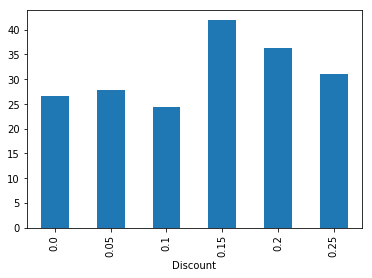

In [156]:
western_europe_plot = dairy_western_europe.groupby("Discount")["Quantity"].mean()
western_europe_plot.plot(kind= 'bar')

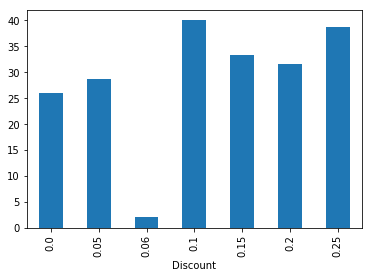

In [157]:
north_america_plot = dairy_north_america.groupby("Discount")["Quantity"].mean()
north_america_plot.plot(kind = 'bar')

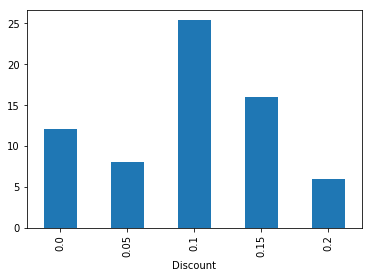

In [158]:
southern_europe_plot = dairy_southern_europe.groupby("Discount")["Quantity"].mean()
southern_europe_plot.plot(kind = "bar")

In [159]:
dairy_southern_europe["Discount"]

73      0.05
213     0.00
516     0.20
576     0.00
842     0.10
1265    0.05
1406    0.15
1473    0.10
1474    0.10
1489    0.00
1739    0.00
1853    0.15
1968    0.00
2088    0.00
Name: Discount, dtype: float64

## What type of test to use: 

In [160]:
st.normaltest(dairy_western_europe["Quantity"])

NormaltestResult(statistic=43.41305525493979, pvalue=3.7408890701628317e-10)

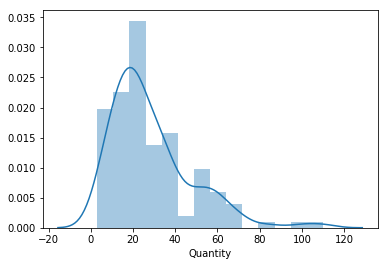

In [161]:
sns.distplot(dairy_western_europe["Quantity"])

In [162]:
st.normaltest(dairy_north_america["Quantity"])

NormaltestResult(statistic=19.2893139423265, pvalue=6.47707159460303e-05)

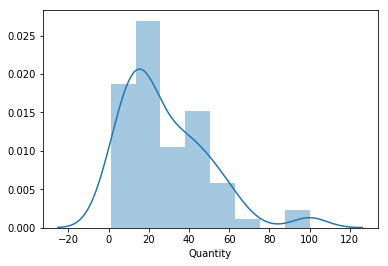

In [163]:
sns.distplot(dairy_north_america["Quantity"])

In [164]:
st.normaltest(dairy_southern_europe["Quantity"])

C:\Users\kayce_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=5.009894828792571, pvalue=0.08167989305885082)

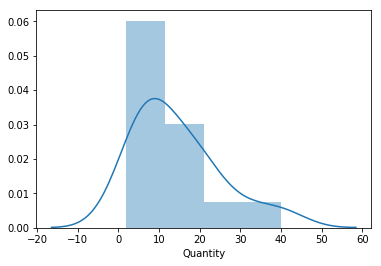

In [165]:
sns.distplot(dairy_southern_europe["Quantity"])

We can reject the null - the data for quantity is normally distributed for all three countries. 

## Test: 

Because the data for the quantities are normally distributed, I will use one tailed student's t tests. We will use the common alpha of 0.05 to reject or fail to reject our null hypotheses. 

#### Western Europe

In [166]:
#test discount levels for each country
western_europe_fifteen = dairy_western_europe.loc[dairy_western_europe["Discount"] == 0.15]["Quantity"]
western_europe_zero = dairy_western_europe.loc[dairy_western_europe["Discount"] == 0.00]["Quantity"]

* H_0 = There is no difference in means between a 0% discount and a 15% discount
* H_a = There is a difference in means between a 0% discount and a 15% discount. 

In [167]:
stats.ttest_ind(western_europe_zero, western_europe_fifteen)

Ttest_indResult(statistic=-2.1589341547507406, pvalue=0.033707574495810244)

We can reject the null- there is a statistical difference between means of a 0% discount and a 15% discount. 

#### North America

In [168]:
north_america_ten = dairy_north_america.loc[dairy_north_america["Discount"] == 0.10]["Quantity"]
north_america_zero = dairy_north_america.loc[dairy_north_america["Discount"] == 0.00]["Quantity"]

* H_0 = There is no difference in means between a 0% discount and 10% discount
* H_a = There is a statistical difference in means between a 0% discount and 10% discount. 

In [169]:
stats.ttest_ind(north_america_zero, north_america_ten) #degrees of freedom =0 

C:\Users\kayce_000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\kayce_000\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\kayce_000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\kayce_000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\kayce_000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_indResult(statistic=nan, pvalue=nan)

In [170]:
# The degrees of freedom = 0 here, so I will need to trouble shoot or find a new test. 

In [171]:
north_america_twentyfive = dairy_north_america.loc[dairy_north_america["Discount"] == 0.25]["Quantity"]

In [172]:
stats.ttest_ind(north_america_zero, north_america_twentyfive)

Ttest_indResult(statistic=-1.2108412058005407, pvalue=0.232569541683908)

The highest mean discount of 10% was unusable due to only having one sample. Therefore, I decided to use the next highest bin, 25%. The p-value is 0.23, so we fail to reject our null. There is not a statistical difference in means to use a 25% discount compared to no discount. 

In [173]:
southern_europe_ten = dairy_southern_europe.loc[dairy_southern_europe["Discount"] == 0.10]["Quantity"]
southern_europe_zero = dairy_southern_europe.loc[dairy_southern_europe["Discount"] == 0.00]["Quantity"]

In [174]:
stats.ttest_ind(southern_europe_zero, southern_europe_ten)

Ttest_indResult(statistic=-2.137653723944187, pvalue=0.06987598641606815)

We cannot reject the null- the p value of 0.06 is barely greater than 0.05. However, because our alpha was set to 0.05, we must assume there is not a statistical difference in means between no discount and a 10% discount. 

## Conclusions: 

* In Western Europe, it would be most efficient based on statistical means to implement a 15% discount on dairy products in order to maximize sales. 
* In North America, it woould not be statistically advisable to have a discount. There is not a statistical difference between having a discount and having a 25% discount. 
* In Southern Europe, despite having the lowest sales of dairy products, it does not make statistical sense to implement a discount. My recommendation to the company would be to increase marketing and promotions for products, and re-evaluate at a later time whether a discount would be beneficial. 

# Hypothesis 4: Is there a single region of employees who are maximizing sales for the company? Is there a region who is not performing as well? 

## EDA:

In [175]:
c.execute("""SELECT Region,Quantity FROM Employee e
                                         JOIN 'Order'o
                                         ON e.ID = o.EmployeeID
                                         JOIN OrderDetail od
                                         ON o.ID = od.OrderID""")
employee_df = pd.DataFrame(c.fetchall())
employee_df.columns =[x[0] for x in c.description]
employee_df.head()

,Region,Quantity
0,British Isles,12
1,British Isles,10
2,British Isles,5
3,British Isles,9
4,British Isles,40


## Visualizations:

Text(0.5, 1.0, 'Quantity of Sales Based on Employee Region')

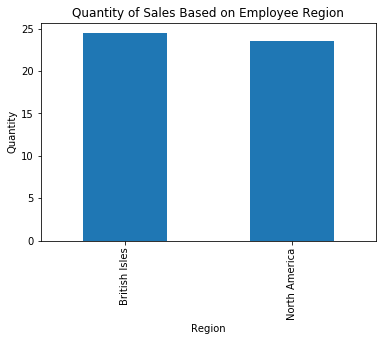

In [176]:
employee_df.groupby("Region")["Quantity"].mean().plot(kind = 'bar')
plt.ylabel("Quantity")
plt.title("Quantity of Sales Based on Employee Region")

In [213]:
#THERE'S ONLY TWO REGIONS THEY SELL FROM 

In [214]:
c.execute("""SELECT Region FROM Employee""")
c.fetchall()

[('North America',),
 ('North America',),
 ('North America',),
 ('North America',),
 ('British Isles',),
 ('British Isles',),
 ('British Isles',),
 ('North America',),
 ('British Isles',)]

## What type of test to use:

In [215]:
north_america = employee_df[employee_df["Region"] == "North America"]["Quantity"]
st.normaltest(north_america)

NormaltestResult(statistic=559.4802441260988, pvalue=3.2389826455977684e-122)

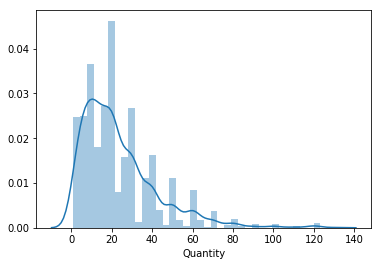

In [216]:
sns.distplot(north_america)

In [217]:
british_isles = employee_df[employee_df["Region"] == "British Isles"]["Quantity"]
st.normaltest(british_isles)

NormaltestResult(statistic=240.6944516372568, pvalue=5.418310820033124e-53)

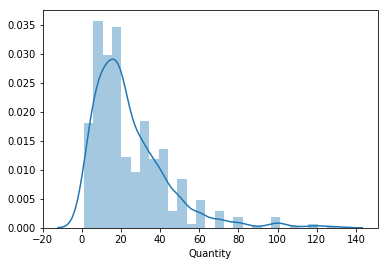

In [218]:
sns.distplot(british_isles)

## Test:

Given the normality of the data and the large number of samples, I believe a two tailed student's t-test will be most appropriate here. I'm choosing a two tailed test because if there's a statistical difference, it is not clear which country would be performing better in terms of sales. I will use the common alpha of 0.05. 

H_0 = There is no statistical difference in mean sales between the British Isles and North America.
H_a = There is a statistical difference in mean sales between the British Isles and North America. 

In [219]:
stats.ttest_ind(north_america, british_isles)

Ttest_indResult(statistic=-0.928456539361685, pvalue=0.35327487750397335)

## Interpret Results:

The p-value is 0.35, which is greater than our alpha of 0.05. There is no statistical difference in means between the two countries. 

## Conclusions: 

Statistically, these countries are performing at a similar rate. Would recommend similar coaching and praise for each region of employees.  

## Conclusions: 

With the data collected and hypotheses tested, I make the following recommendations to the North Wind company: 

* Across the board, a 5% discount is statistically more effective than a 25% discount. I would recommend using a 5% discount where appropriate, rather than a 25% discount. 
* The highest performing category was dairy products. With that in mind, the different regions were tested and it was found that North America and Western Europe were the highest consumers of dairy products. Southern Europe was the lowest. My recommendation would be to increase stock in North America and Western Europe. 
* Of these regions, it was researched where a discount may be most effective to maximize sales. It is recommended that a 15% discount be implemented in Western Europe where sales are already high. However, in North America and Southern Europe, based on current data, it was not found to be statistically significant to implement a discount. 
* Both of the regions that North Wind operates out of where found to have statistically similar amounts of sales. I do not recommend any coaching for a specific region. 

